In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# 자사 식료품의 전체 제품대비 판매 비중 그래프로 나타내기
#
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False



In [3]:
df_member=pd.read_csv('Member_data02.csv')
df_member=df_member.dropna()

df_member['ID_str']=df_member['ID'].apply (lambda x : str(x).split(sep='.')[0])


df_member['ID_str']

0        201812310749735
1        201812310749770
2        201812310749771
3        201812310749774
4        201812310749780
              ...       
81089    201912291058164
81090    201912291058167
81091    201912291058168
81092    201912291058169
81093    201912291058171
Name: ID_str, Length: 81094, dtype: object

In [4]:
df_sales= pd.read_csv('Sales_data02.csv')
df_sales['고객번호']

C:\Users\king\AppData\Local\Temp\ipykernel_8580\3019678415.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sales= pd.read_csv('Sales_data02.csv')


0              201812310749735
1              201812310749735
2              201812310749770
3              201812310749771
4              201812310749774
                  ...         
199994    20200724113017315991
199995    20200729134409126553
199996    20200803075905757887
199997    20200805170229147688
199998    20200805223526494551
Name: 고객번호, Length: 199999, dtype: object

In [5]:
df_merge = pd.merge(df_sales, df_member ,how= 'left', left_on='고객번호' ,right_on='ID')


df_merge =df_merge.dropna().reset_index()
df_merge

,index,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,ID_str
0,0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),2.018123e+14,여,기혼,인천,37.0,국민은행,인스타그램,Yes,201812310749735
1,1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),2.018123e+14,여,기혼,인천,37.0,국민은행,인스타그램,Yes,201812310749735
2,3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),2.018123e+14,여,기혼,부산,32.0,하나은행,네이버블로그,Yes,201812310749771
3,4,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640,39788,기저귀,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),2.018123e+14,여,미혼,경남,34.0,기업은행,지인추천,No,201812310749774
4,5,201907282649358,2019-07-29,2019-07-30,2019-08-02,8.0,201812310749774,101280,76744,기저귀,[2019년형] 하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),2.018123e+14,여,미혼,경남,34.0,기업은행,지인추천,No,201812310749774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165695,196595,201912183195240,2019-12-19,2019-12-20,2019-12-23,4.0,201912181051548,12900,8167,더블하트,더블하트 SofTouch 모유실감 젖꼭지 LL (2입),2.019122e+14,여,기혼,충남,34.0,광주은행,인스타그램,Yes,201912181051548
165696,196596,202001273336565,2020-01-27,2020-01-28,2020-01-30,6.0,201912181051548,12900,8820,더블하트,더블하트 SofTouch 모유실감 젖꼭지 LL (2입),2.019122e+14,여,기혼,충남,34.0,광주은행,인스타그램,Yes,201912181051548
165697,196597,201912183195387,2019-12-19,2019-12-20,2019-12-22,46.0,201912181051549,31620,10275,SKC,그린핑거 마이키즈 자두야에디션 핸드워시 프레쉬 300ml,2.019122e+14,여,기혼,경기,33.0,농협중앙회,인스타그램,Yes,201912181051549
165698,196600,201912183195335,2019-12-19,2019-12-20,2019-12-23,63.0,201912181051577,45000,26100,SKC,그린핑거 마이키즈 워시 500ml(대용량) + 샴푸 500ml(대용량),2.019122e+14,여,기혼,서울,38.0,롯데카드,인스타그램,Yes,201912181051577


In [6]:
df_price=df_merge.groupby('고객번호').count()['주문번호']
df_price

고객번호
201812310749735    2
201812310749771    1
201812310749774    2
201812310749780    1
201812310749784    8
                  ..
201912181051547    2
201912181051548    2
201912181051549    1
201912181051577    1
201912181051582    1
Name: 주문번호, Length: 64316, dtype: int64

In [7]:


df_merge=pd.merge(df_merge, df_price , how='left', left_on='ID', right_on='고객번호')
df_merge['배송시간']= pd.to_datetime(df_merge['배송완료일'],format='%Y-%m-%d') - pd.to_datetime(df_merge['구매일'],format='%Y-%m-%d')
df_merge


,index,주문번호_x,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,...,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,ID_str,주문번호_y,배송시간
0,0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,더블하트,...,여,기혼,인천,37.0,국민은행,인스타그램,Yes,201812310749735,2,5 days
1,1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,팬티,...,여,기혼,인천,37.0,국민은행,인스타그램,Yes,201812310749735,2,3 days
2,3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,기저귀,...,여,기혼,부산,32.0,하나은행,네이버블로그,Yes,201812310749771,1,3 days
3,4,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640,39788,기저귀,...,여,미혼,경남,34.0,기업은행,지인추천,No,201812310749774,2,3 days
4,5,201907282649358,2019-07-29,2019-07-30,2019-08-02,8.0,201812310749774,101280,76744,기저귀,...,여,미혼,경남,34.0,기업은행,지인추천,No,201812310749774,2,4 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165695,196595,201912183195240,2019-12-19,2019-12-20,2019-12-23,4.0,201912181051548,12900,8167,더블하트,...,여,기혼,충남,34.0,광주은행,인스타그램,Yes,201912181051548,2,4 days
165696,196596,202001273336565,2020-01-27,2020-01-28,2020-01-30,6.0,201912181051548,12900,8820,더블하트,...,여,기혼,충남,34.0,광주은행,인스타그램,Yes,201912181051548,2,3 days
165697,196597,201912183195387,2019-12-19,2019-12-20,2019-12-22,46.0,201912181051549,31620,10275,SKC,...,여,기혼,경기,33.0,농협중앙회,인스타그램,Yes,201912181051549,1,3 days
165698,196600,201912183195335,2019-12-19,2019-12-20,2019-12-23,63.0,201912181051577,45000,26100,SKC,...,여,기혼,서울,38.0,롯데카드,인스타그램,Yes,201912181051577,1,4 days


In [8]:
df_merge['배송시간']= pd.to_datetime(df_merge['배송완료일'],format='%Y-%m-%d') - pd.to_datetime(df_merge['구매일'],format='%Y-%m-%d')
df_merge

,index,주문번호_x,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,...,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,ID_str,주문번호_y,배송시간
0,0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,더블하트,...,여,기혼,인천,37.0,국민은행,인스타그램,Yes,201812310749735,2,5 days
1,1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,팬티,...,여,기혼,인천,37.0,국민은행,인스타그램,Yes,201812310749735,2,3 days
2,3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,기저귀,...,여,기혼,부산,32.0,하나은행,네이버블로그,Yes,201812310749771,1,3 days
3,4,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640,39788,기저귀,...,여,미혼,경남,34.0,기업은행,지인추천,No,201812310749774,2,3 days
4,5,201907282649358,2019-07-29,2019-07-30,2019-08-02,8.0,201812310749774,101280,76744,기저귀,...,여,미혼,경남,34.0,기업은행,지인추천,No,201812310749774,2,4 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165695,196595,201912183195240,2019-12-19,2019-12-20,2019-12-23,4.0,201912181051548,12900,8167,더블하트,...,여,기혼,충남,34.0,광주은행,인스타그램,Yes,201912181051548,2,4 days
165696,196596,202001273336565,2020-01-27,2020-01-28,2020-01-30,6.0,201912181051548,12900,8820,더블하트,...,여,기혼,충남,34.0,광주은행,인스타그램,Yes,201912181051548,2,3 days
165697,196597,201912183195387,2019-12-19,2019-12-20,2019-12-22,46.0,201912181051549,31620,10275,SKC,...,여,기혼,경기,33.0,농협중앙회,인스타그램,Yes,201912181051549,1,3 days
165698,196600,201912183195335,2019-12-19,2019-12-20,2019-12-23,63.0,201912181051577,45000,26100,SKC,...,여,기혼,서울,38.0,롯데카드,인스타그램,Yes,201912181051577,1,4 days


In [9]:
df_merge.rename(columns={'주문번호_y':'주문횟수'}, inplace=True)
df_merge.rename(columns={'주문번호_x':'주문번호'},inplace=True)
df_merge

,index,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,...,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,ID_str,주문횟수,배송시간
0,0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,더블하트,...,여,기혼,인천,37.0,국민은행,인스타그램,Yes,201812310749735,2,5 days
1,1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,팬티,...,여,기혼,인천,37.0,국민은행,인스타그램,Yes,201812310749735,2,3 days
2,3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,기저귀,...,여,기혼,부산,32.0,하나은행,네이버블로그,Yes,201812310749771,1,3 days
3,4,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640,39788,기저귀,...,여,미혼,경남,34.0,기업은행,지인추천,No,201812310749774,2,3 days
4,5,201907282649358,2019-07-29,2019-07-30,2019-08-02,8.0,201812310749774,101280,76744,기저귀,...,여,미혼,경남,34.0,기업은행,지인추천,No,201812310749774,2,4 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165695,196595,201912183195240,2019-12-19,2019-12-20,2019-12-23,4.0,201912181051548,12900,8167,더블하트,...,여,기혼,충남,34.0,광주은행,인스타그램,Yes,201912181051548,2,4 days
165696,196596,202001273336565,2020-01-27,2020-01-28,2020-01-30,6.0,201912181051548,12900,8820,더블하트,...,여,기혼,충남,34.0,광주은행,인스타그램,Yes,201912181051548,2,3 days
165697,196597,201912183195387,2019-12-19,2019-12-20,2019-12-22,46.0,201912181051549,31620,10275,SKC,...,여,기혼,경기,33.0,농협중앙회,인스타그램,Yes,201912181051549,1,3 days
165698,196600,201912183195335,2019-12-19,2019-12-20,2019-12-23,63.0,201912181051577,45000,26100,SKC,...,여,기혼,서울,38.0,롯데카드,인스타그램,Yes,201912181051577,1,4 days


In [10]:
# 지역별 
df_order_counting =df_merge.groupby(['거주지역'], as_index=False)['배송시간'].count().sort_values(by='배송시간', ascending=False)
df_order_counting.rename(columns={'배송시간':'총주문횟수'}, inplace= True)
df_order_counting['총주문횟수'].sum()
# plt.scatter(df_merge['거주지역'],df_merge['배송시간'].count())

165700

In [11]:
# 지역별 평균 주문횟수
df_mean_order=df_merge.groupby(['거주지역'], as_index=False)['주문횟수'].mean().sort_values(by=['주문횟수'] ,ascending=False)
df_mean_order

,거주지역,주문횟수
3,경북,7.255152
4,광주,7.048282
9,인천,6.642285
6,대전,6.464941
0,강원,6.297418
10,전남,6.294363
14,충북,6.292344
8,서울,6.188625
1,경기,6.072094
11,전북,5.935255


In [12]:
df_merge['주문횟수']

0         2
1         2
2         1
3         2
4         2
         ..
165695    2
165696    2
165697    1
165698    1
165699    1
Name: 주문횟수, Length: 165700, dtype: int64

In [13]:
# 중복되는 아이디제거
df_same_remove=df_merge.drop_duplicates(['ID'])
df_same_remove['주문횟수']

0         2
2         1
3         2
5         1
6         8
         ..
165693    2
165695    2
165697    1
165698    1
165699    1
Name: 주문횟수, Length: 64316, dtype: int64

In [14]:
df_same_remove['구매일']

0         2019-05-06
2         2019-05-13
3         2019-05-10
5         2019-01-30
6         2019-04-29
             ...    
165693    2020-01-07
165695    2019-12-19
165697    2019-12-19
165698    2019-12-19
165699    2020-05-22
Name: 구매일, Length: 64316, dtype: object

In [15]:
df_order=pd.DataFrame(df_same_remove['주문횟수'].value_counts()).sort_index()




# df_merge.groupby('고객번호').count()['주문번호']


In [16]:
df_order_a=df_order.iloc[0:8]
df_order_a.loc[9]=2902
df_order_a

C:\Users\king\AppData\Local\Temp\ipykernel_8580\2296264619.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_order_a.loc[9]=2902


,주문횟수
1,33723
2,11822
3,6020
4,3670
5,2363
6,1717
7,1193
8,906
9,2902


In [17]:
df_order_a['총 주문횟수']=['1번','2번','3번','4번','5번','6번','7번','8번','9번이상']
df_order_a

C:\Users\king\AppData\Local\Temp\ipykernel_8580\2065657751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_order_a['총 주문횟수']=['1번','2번','3번','4번','5번','6번','7번','8번','9번이상']


,주문횟수,총 주문횟수
1,33723,1번
2,11822,2번
3,6020,3번
4,3670,4번
5,2363,5번
6,1717,6번
7,1193,7번
8,906,8번
9,2902,9번이상


In [18]:
df_order_a.rename(columns={'주문횟수':'주문자수'},inplace=True)
df_order_a.rename(columns={'총 주문횟수':'주문횟수'},inplace=True)
df_order_a

C:\Users\king\AppData\Local\Temp\ipykernel_8580\883147563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_order_a.rename(columns={'주문횟수':'주문자수'},inplace=True)
C:\Users\king\AppData\Local\Temp\ipykernel_8580\883147563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_order_a.rename(columns={'총 주문횟수':'주문횟수'},inplace=True)


,주문자수,주문횟수
1,33723,1번
2,11822,2번
3,6020,3번
4,3670,4번
5,2363,5번
6,1717,6번
7,1193,7번
8,906,8번
9,2902,9번이상


<BarContainer object of 9 artists>

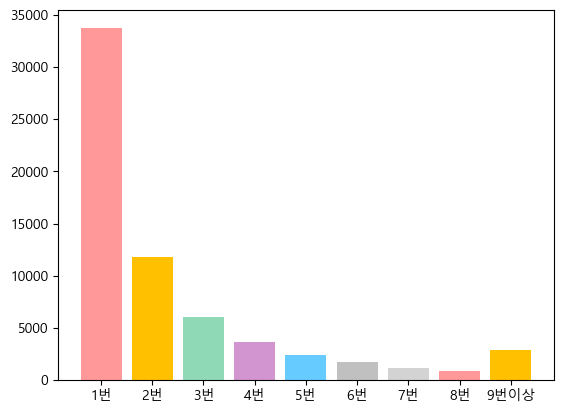

In [26]:
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','#66ccff','silver', 'lightgray']
plt.bar(df_order_a['주문횟수'], height=df_order_a['주문자수'], color=colors)

([<matplotlib.patches.Wedge at 0x17abc21b250>,
 [Text(-1.1099350003728539, 0.01201228318484379, '1번'),
  Text(0.6896145099681588, -0.92028899137248, '2번'),
  Text(1.1481843671042054, -0.06459612323905989, '3번'),
  Text(1.0513986013467298, 0.4658980372207425, '4번'),
  Text(0.8707588368846677, 0.7511850956903103, '5번'),
  Text(0.7048072533271039, 0.908706077704724, '6번'),
  Text(0.5937056311351695, 1.0428392127065371, '7번'),
  Text(0.5161116217368972, 1.1713363282627711, '8번'),
  Text(0.2951276318058827, 1.2660567447569844, '9번이상')],
 [Text(-0.6099642794841809, 0.006601344813292533, '52.4%'),
  Text(0.3897821143298288, -0.5201633429496625, '18.4%'),
  Text(0.6489737727110725, -0.03651085226555559, '9.4%'),
  Text(0.5942687746742386, 0.263333673211724, '5.7%'),
  Text(0.49216803823916, 0.42458288017278406, '3.7%'),
  Text(0.3983693170979283, 0.51361647870267, '2.7%'),
  Text(0.34632828482884886, 0.6083228740788132, '1.9%'),
  Text(0.3145055194959217, 0.7137830750351262, '1.4%'),
  Text(0.

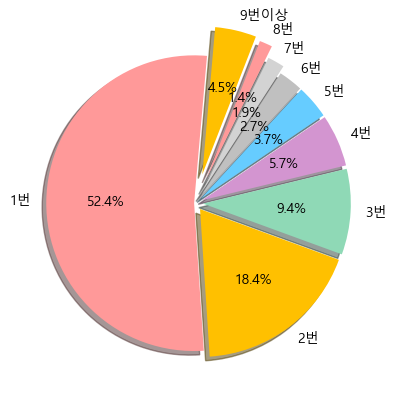

In [42]:
explode = [0.01,0.05,0.05,0.05,0.05,0.05,0.1,0.18,0.2]
plt.pie(df_order_a['주문자수'],labels=df_order_a['주문횟수'], startangle=85,colors=colors,shadow=True, autopct='%1.1f%%',explode=explode)

In [ ]:
#클러스터링

df_same_remove['replace_성별'] = df_same_remove['성별'].replace('남', 0).replace('여', 1)
df_same_remove = df_same_remove.dropna().reset_index()
df_same_remove

C:\Users\유으뜸\AppData\Local\Temp\ipykernel_12628\879285.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_same_remove['replace_성별'] = df_same_remove['성별'].replace('남', 0).replace('여', 1)


,level_0,index,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,...,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,ID_str,주문횟수,배송시간,replace_성별
0,0,0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,...,기혼,인천,37.0,국민은행,인스타그램,Yes,201812310749735,2,5 days,1
1,2,3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,...,기혼,부산,32.0,하나은행,네이버블로그,Yes,201812310749771,1,3 days,1
2,3,4,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640,39788,...,미혼,경남,34.0,기업은행,지인추천,No,201812310749774,2,3 days,1
3,5,6,201901301958105,2019-01-30,2019-01-31,2019-02-02,2.0,201812310749780,27920,19900,...,기혼,서울,32.0,신한은행,직접검색,Yes,201812310749780,1,3 days,1
4,6,15,201904292316940,2019-04-29,2019-04-30,2019-05-04,3.0,201812310749784,6040,4851,...,기혼,충북,33.0,국민은행,네이버블로그,Yes,201812310749784,8,5 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64311,165693,196593,202001063269622,2020-01-07,2020-01-08,2020-01-10,6.0,201912181051547,12900,6385,...,기혼,서울,40.0,신한은행,인스타그램,Yes,201912181051547,2,3 days,1
64312,165695,196595,201912183195240,2019-12-19,2019-12-20,2019-12-23,4.0,201912181051548,12900,8167,...,기혼,충남,34.0,광주은행,인스타그램,Yes,201912181051548,2,4 days,1
64313,165697,196597,201912183195387,2019-12-19,2019-12-20,2019-12-22,46.0,201912181051549,31620,10275,...,기혼,경기,33.0,농협중앙회,인스타그램,Yes,201912181051549,1,3 days,1
64314,165698,196600,201912183195335,2019-12-19,2019-12-20,2019-12-23,63.0,201912181051577,45000,26100,...,기혼,서울,38.0,롯데카드,인스타그램,Yes,201912181051577,1,4 days,1


In [ ]:
from sklearn.cluster import KMeans
kmc = KMeans(n_clusters=6, init='random', max_iter=100, random_state=0)
kmc.fit(X)

NameError: name 'X' is not defined

<AxesSubplot: xlabel='주문횟수', ylabel='count'>

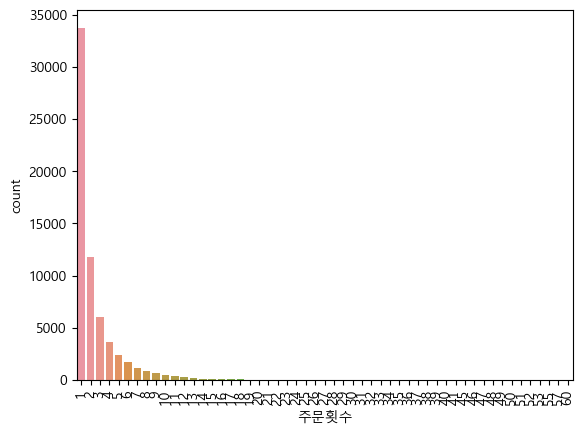

In [ ]:
plt.xticks(rotation=90)
sns.countplot(data=df_same_remove, x='주문횟수')


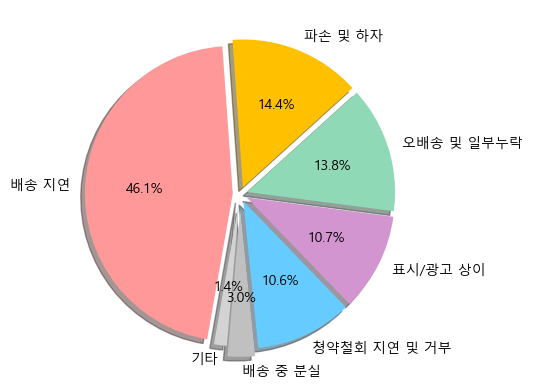

In [ ]:
import matplotlib.pyplot as plt

ratio = [46.1, 14.4, 13.8, 10.7,10.6,3.0,1.4]
labels = ['배송 지연', '파손 및 하자', '오배송 및 일부누락', '표시/광고 상이', '쳥약철회 지연 및 거부', '배송 중 분실', '기타']
explode = [0.05,0.05,0.05,0.05,0.05,0.10,0.03]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','#66ccff','silver', 'lightgray']
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode,shadow=True, colors=colors)
plt.show()
